In [274]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

import datetime

In [275]:
colors = cm.tab10

In [276]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
confirmed_US = confirmed_US.iloc[:,6:].drop('Combined_Key', axis = 1)
confirmed_US.columns = [c.replace('Long_', 'Long').replace('_', '/') for c in confirmed_US.columns]
confirmed = confirmed.append(confirmed_US, sort=False)

deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
deaths_US = deaths_US.iloc[:,6:].drop('Combined_Key', axis = 1).drop('Population', axis = 1)
deaths_US.columns = [c.replace('Long_', 'Long').replace('_', '/') for c in deaths_US.columns]
deaths = deaths.append(deaths_US, sort=False)

In [277]:
confirmed.columns = list(confirmed.columns[:4]) + [datetime.datetime.strptime(c, '%m/%d/%y').strftime('%Y%m%d') for c in confirmed.columns[4:]]
deaths.columns = list(deaths.columns[:4]) + [datetime.datetime.strptime(c, '%m/%d/%y').strftime('%Y%m%d') for c in deaths.columns[4:]]

In [278]:
if all(pd.isnull(confirmed.iloc[:,-1])):
    confirmed = confirmed.iloc[:,:-1]
    deaths = deaths.iloc[:,:-1]

In [279]:
regionss = [['New York', 'California', 'Michigan', 'Illinois'],
            ['Florida', 'Oklahoma', 'Tennessee', 'Wisconsin', 'Arkansas', 'Alabama'],
            ['Australia', 'New Zealand', 'Victoria', 'Thailand'],
            ['Japan', 'Korea, South', 'Italy', 'Spain'],
            ['India', 'Sweden']
           ]

In [280]:
death_rate = pd.DataFrame()
for regions in regionss:
    for region in regions:
        idxc = (confirmed['Province/State'] == region)
        idxd = (deaths['Province/State'] == region)
        if sum(idxc) == 0:
            idxc = (confirmed['Country/Region'] == region)
        if sum(idxd) == 0:
            idxd = (deaths['Country/Region'] == region)

        total_cases = confirmed.loc[idxc].iloc[:,4:].sum(axis = 0)
        died = deaths.loc[idxd].iloc[:,4:].sum(axis = 0)
        death_rate[region] = died / total_cases

death_rate = death_rate.fillna(0)

## States

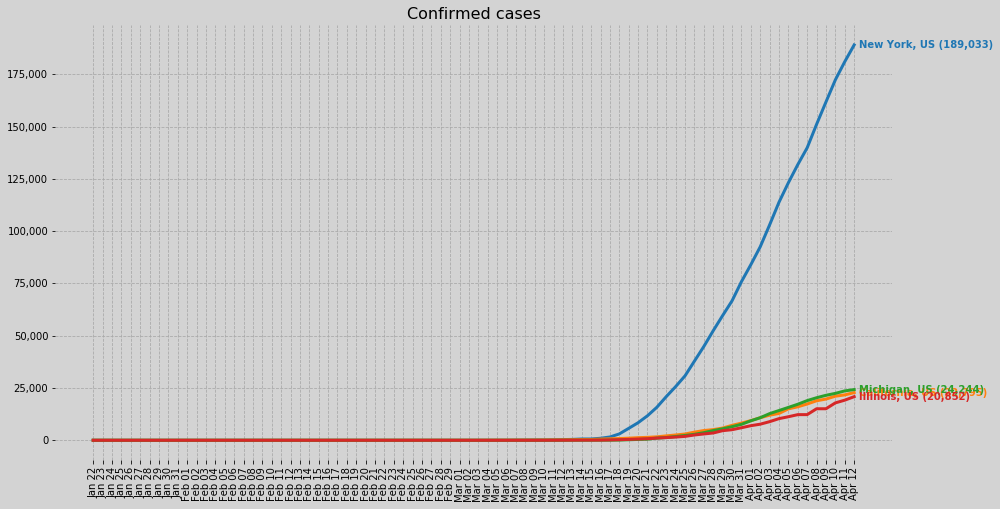

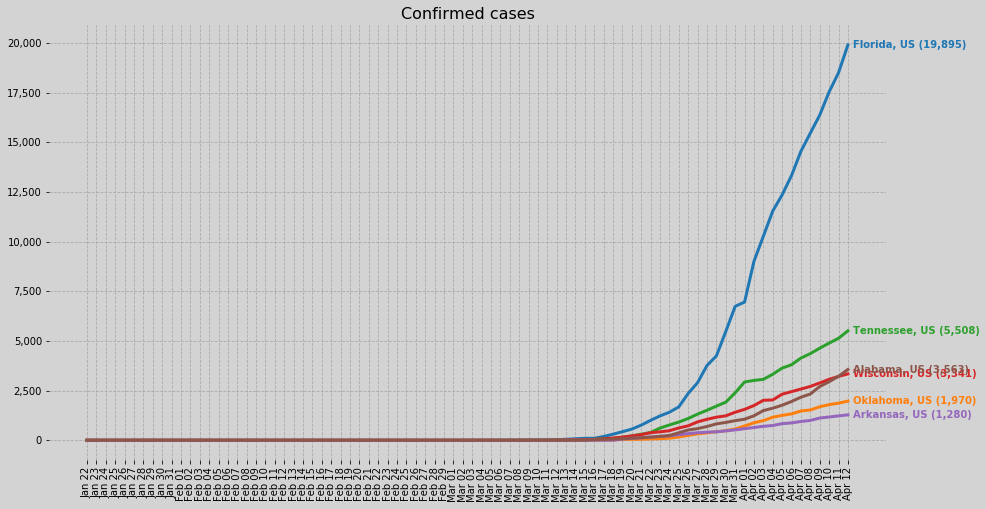

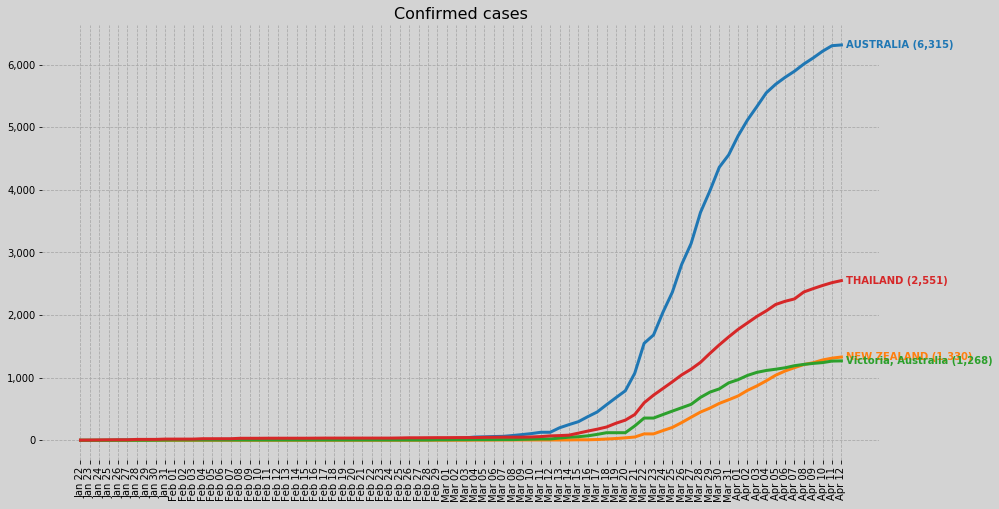

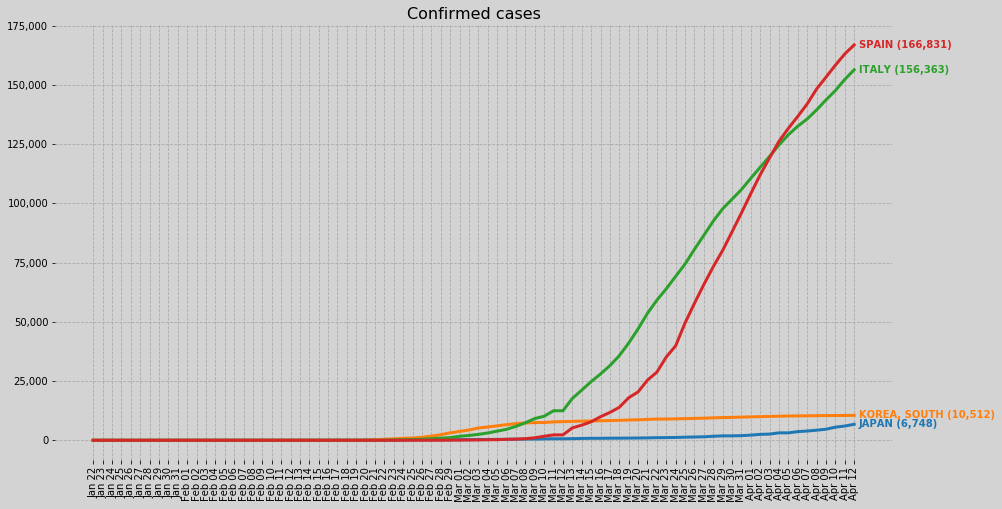

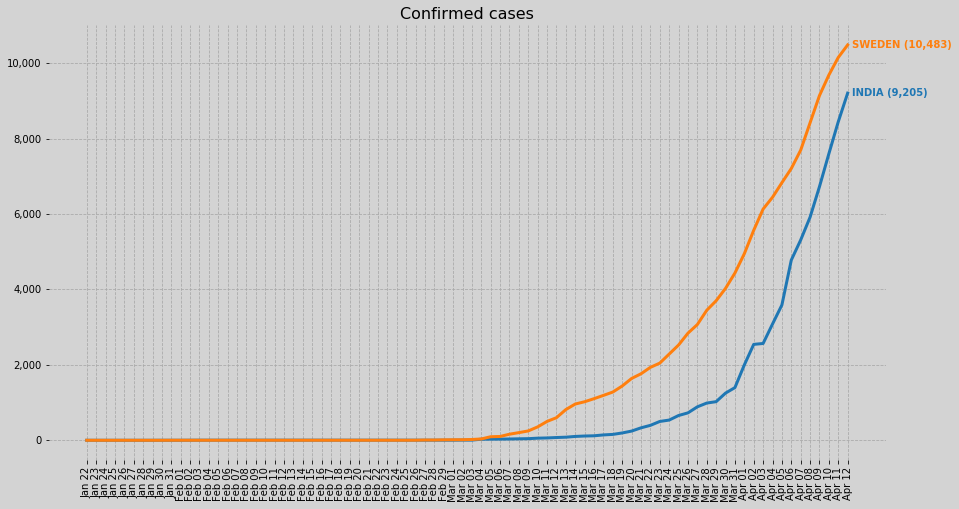

In [281]:
for regions in regionss:
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)

    minx = 0

    for n,s in enumerate(regions):
        region = regions[n]
        idx = (confirmed['Province/State'] == region)
        if sum(idx) == 0:
            idx = (confirmed['Country/Region'] == region)
            l = '{}'.format(confirmed.loc[idx, 'Country/Region'].head(1).item()).upper()
        else:
            l = '{}, {}'.format(region, confirmed.loc[idx, 'Country/Region'].head(1).item())
        dat = confirmed.loc[idx]
        dat = dat.iloc[:,4:].sum(axis = 0)

        y = list(dat)
        x = [datetime.datetime.strptime(c, '%Y%m%d') for c in dat.index]

        tmp = next((i for i, x in enumerate(y) if x), None)
        if tmp > minx:
            minx = tmp

        ax.plot(x, y, color = colors(n), linewidth = 3)
        ax.text(x[-1]+datetime.timedelta(0.5), y[-1], '{} ({:,.0f})'.format(l, y[-1]), color = colors(n), va = 'center', ha = 'left', fontweight = 'bold')

    for var in ['top', 'bottom', 'left', 'right']:
        ax.spines[var].set_visible(False)

    ax.grid(linestyle = '--', color = 'darkgrey')

    ax.set_xticks(x)
    #ax.set_xlim((x[minx-5], x[-1]))
    ax.set_title('Confirmed cases', fontsize = 16)

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_ha('center')
        tick.set_va('top')

    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

    xfmt = mdates.DateFormatter('%b %d')
    ax.get_figure().set_facecolor('lightgrey')
    ax.set_facecolor('lightgrey')
    ax.xaxis.set_major_formatter(xfmt)

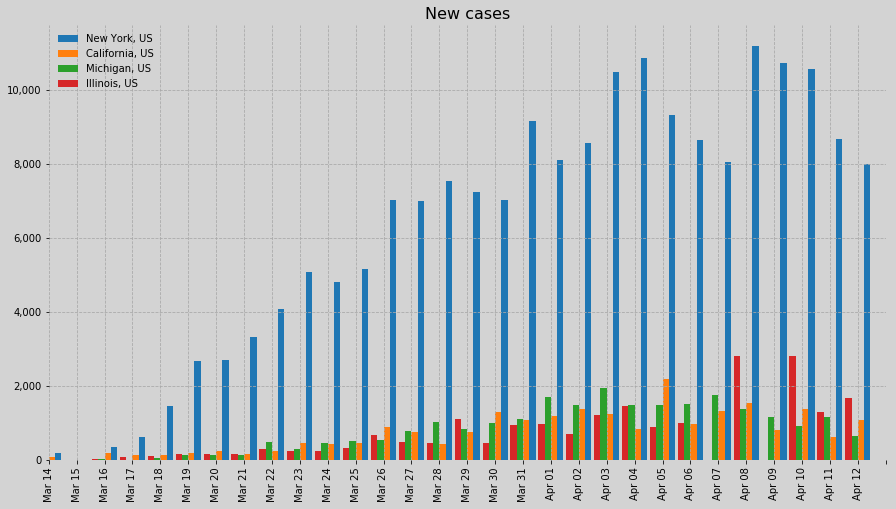

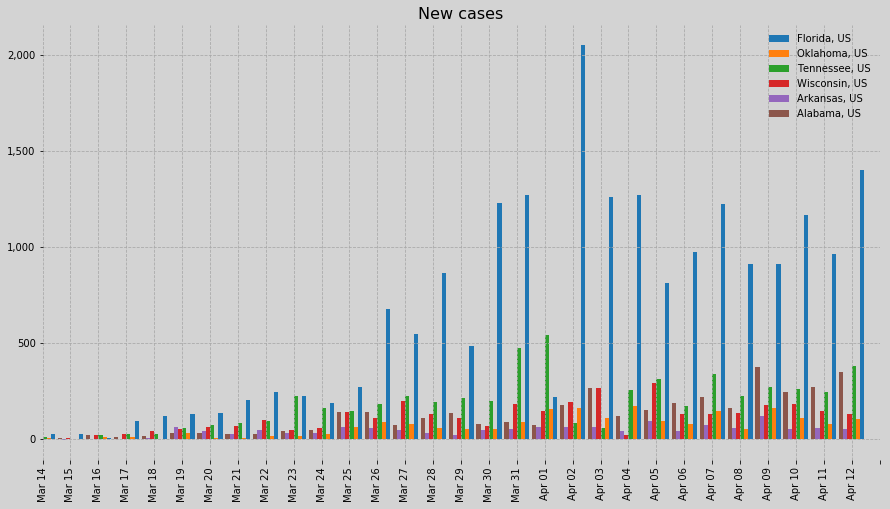

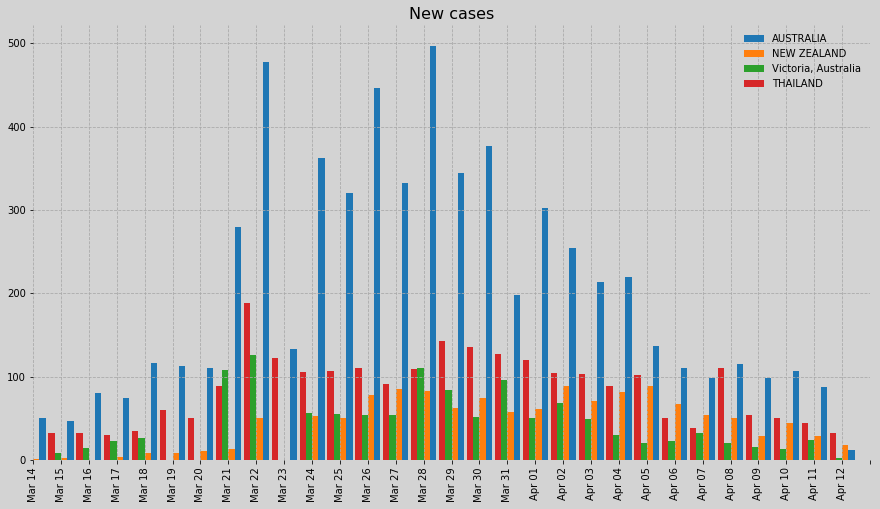

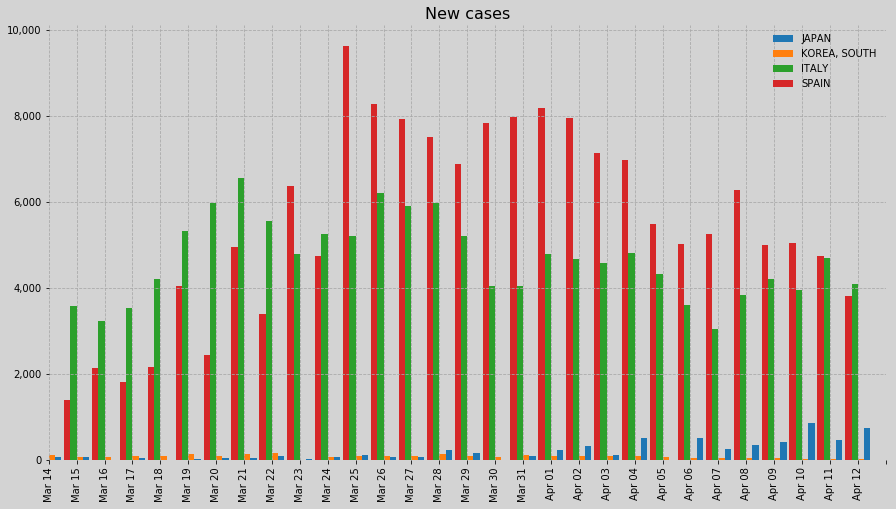

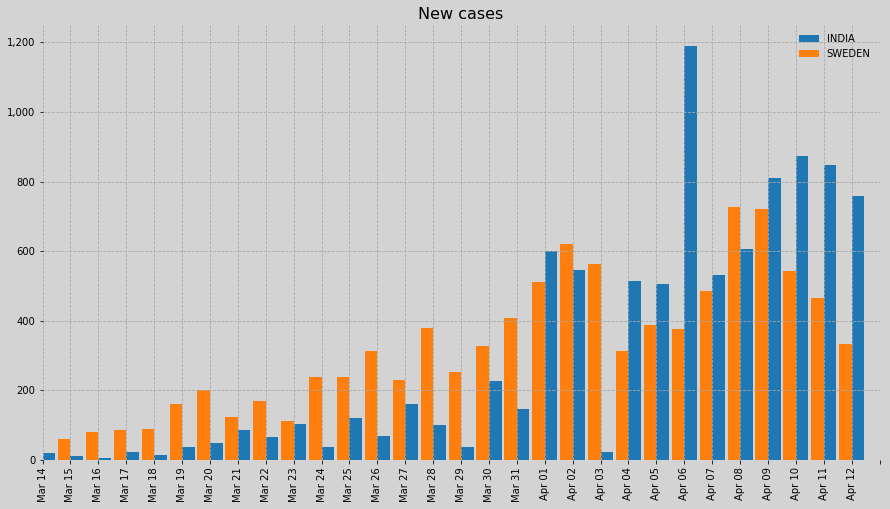

In [282]:
for regions in regionss:
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)

    minx = 0
    width = 0.9/len(regions)

    for n,s in enumerate(regions):
        region = regions[n]
        idx = (confirmed['Province/State'] == region)
        if sum(idx) == 0:
            idx = (confirmed['Country/Region'] == region)
            l = '{}'.format(confirmed.loc[idx, 'Country/Region'].head(1).item()).upper()
        else:
            l = '{}, {}'.format(region, confirmed.loc[idx, 'Country/Region'].head(1).item())
        dat = confirmed.loc[idx]
        dat = dat.iloc[:,4:].sum(axis = 0)

        y = np.diff(list(dat))
        x = np.arange(len(y))

        tmp = next((i for i, x in enumerate(y) if x), None)
        if tmp > minx:
            minx = tmp

        xpos = x + (len(regions)/2 * width) - (n*width) - (width/2)
        ax.bar(x = xpos, height = y, width = width, color = colors(n), label = l)
        #ax.plot(x, y, marker = '', color = colors(n), label = l, linestyle = '-')

    for var in ['top', 'bottom', 'left', 'right']:
        ax.spines[var].set_visible(False)

    ax.grid(linestyle = '--', color = 'darkgrey')
    ax.legend(frameon = False)
    ax.set_title('New cases', fontsize = 16)

    x = [datetime.datetime.strptime(c, '%Y%m%d') for c in dat.index][1:]
    ax.set_xticks(np.arange(len(x)+10))
    ax.set_xticklabels([c.strftime('%b %d') for c in x])
    ax.set_xlim(max(minx-5,0), len(x))
    ax.set_xlim(ax.get_xlim()[1]-30, ax.get_xlim()[1])

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_ha('center')
        tick.set_va('top')

    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

    xfmt = mdates.DateFormatter('%b %d')
    ax.get_figure().set_facecolor('lightgrey')
    ax.set_facecolor('lightgrey')
    #ax.xaxis.set_major_formatter(xfmt)

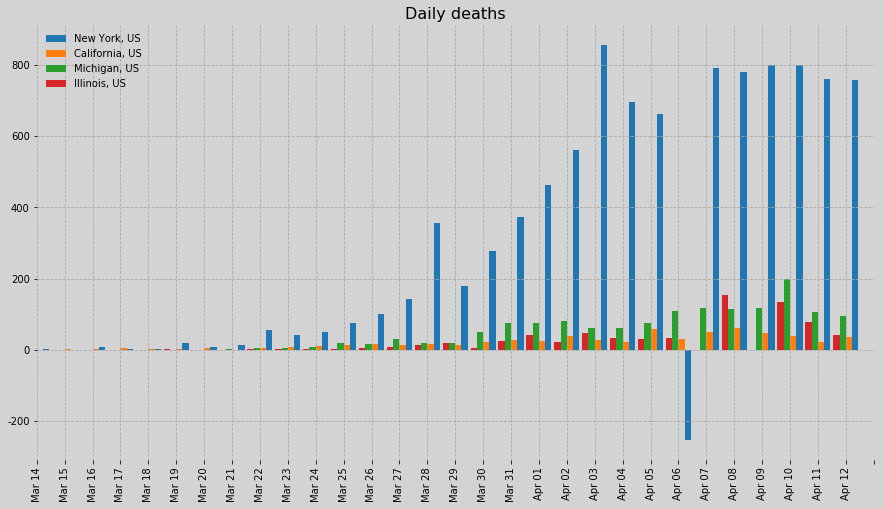

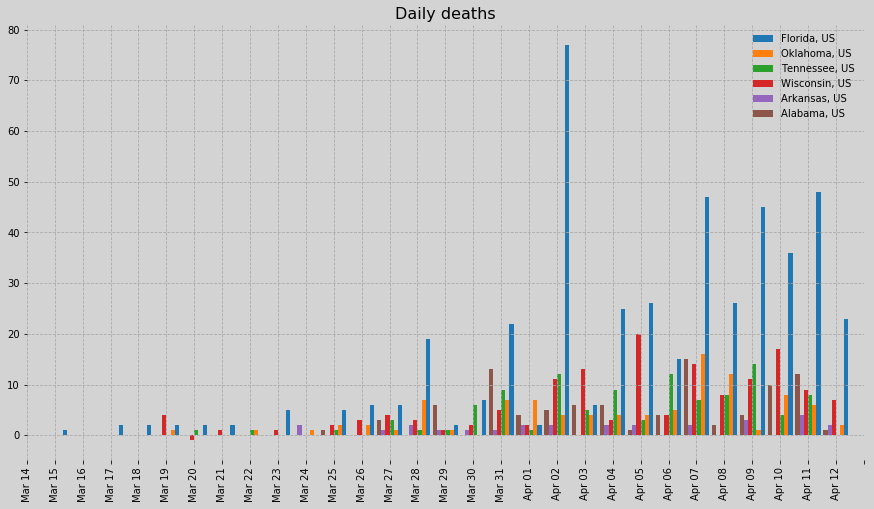

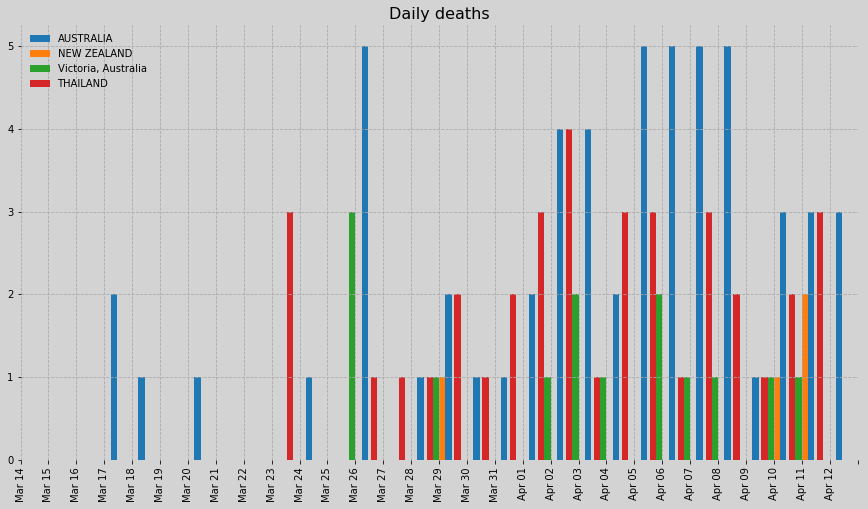

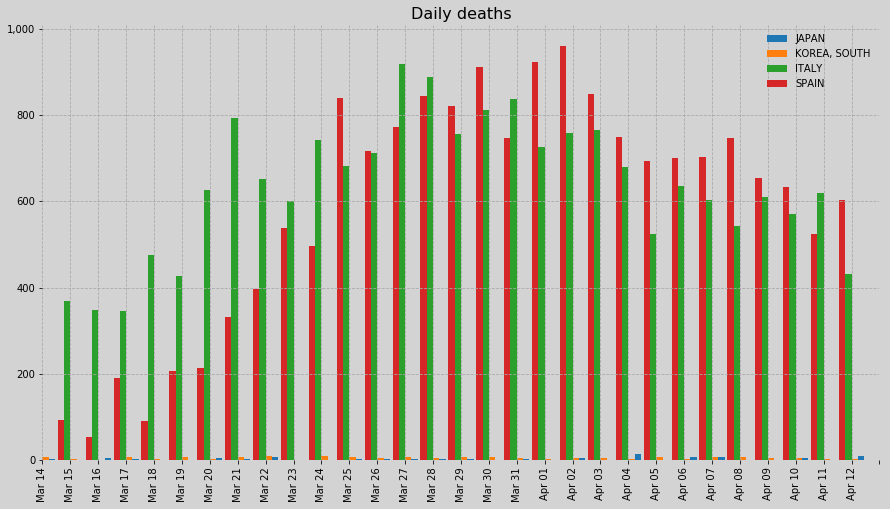

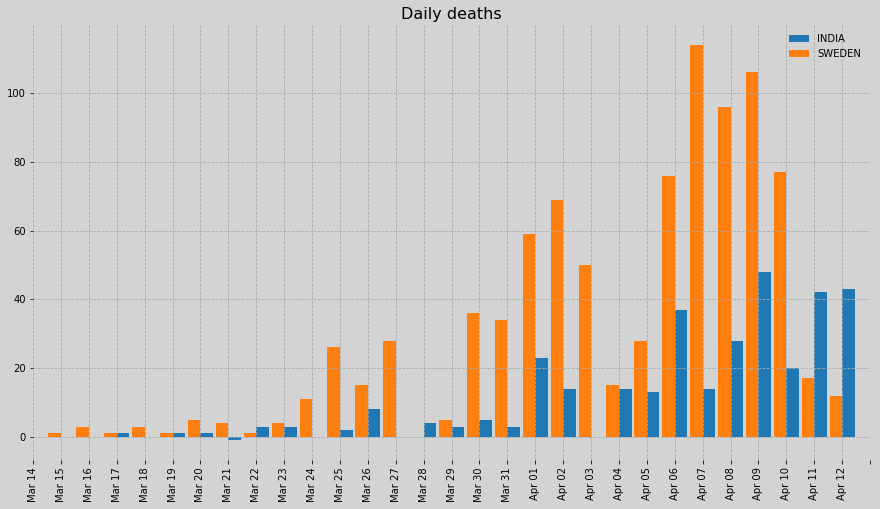

In [283]:
for regions in regionss:
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)

    minx = 0
    width = 0.9/len(regions)

    for n,s in enumerate(regions):
        region = regions[n]
        idx = (deaths['Province/State'] == region)
        if sum(idx) == 0:
            idx = (deaths['Country/Region'] == region)
            l = '{}'.format(deaths.loc[idx, 'Country/Region'].head(1).item()).upper()
        else:
            l = '{}, {}'.format(region, deaths.loc[idx, 'Country/Region'].head(1).item())
        dat = deaths.loc[idx]
        dat = dat.iloc[:,4:].sum(axis = 0)

        y = np.diff(list(dat))
        x = np.arange(len(y))

        tmp = next((i for i, x in enumerate(y) if x), None)
        if tmp > minx:
            minx = tmp

        xpos = x + (len(regions)/2 * width) - (n*width) - (width/2)
        ax.bar(x = xpos, height = y, width = width, color = colors(n), label = l)
        #ax.plot(x, y, marker = '', color = colors(n), label = l, linestyle = '-')

    for var in ['top', 'bottom', 'left', 'right']:
        ax.spines[var].set_visible(False)

    ax.grid(linestyle = '--', color = 'darkgrey')
    ax.legend(frameon = False)
    ax.set_title('Daily deaths', fontsize = 16)

    x = [datetime.datetime.strptime(c, '%Y%m%d') for c in dat.index][1:]
    ax.set_xticks(np.arange(len(x)+10))
    ax.set_xticklabels([c.strftime('%b %d') for c in x])
    ax.set_xlim(max(minx-5,0), len(x))
    ax.set_xlim(ax.get_xlim()[1]-30, ax.get_xlim()[1])

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_ha('center')
        tick.set_va('top')

    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

    xfmt = mdates.DateFormatter('%b %d')
    ax.get_figure().set_facecolor('lightgrey')
    ax.set_facecolor('lightgrey')
    #ax.xaxis.set_major_formatter(xfmt)

## Rates

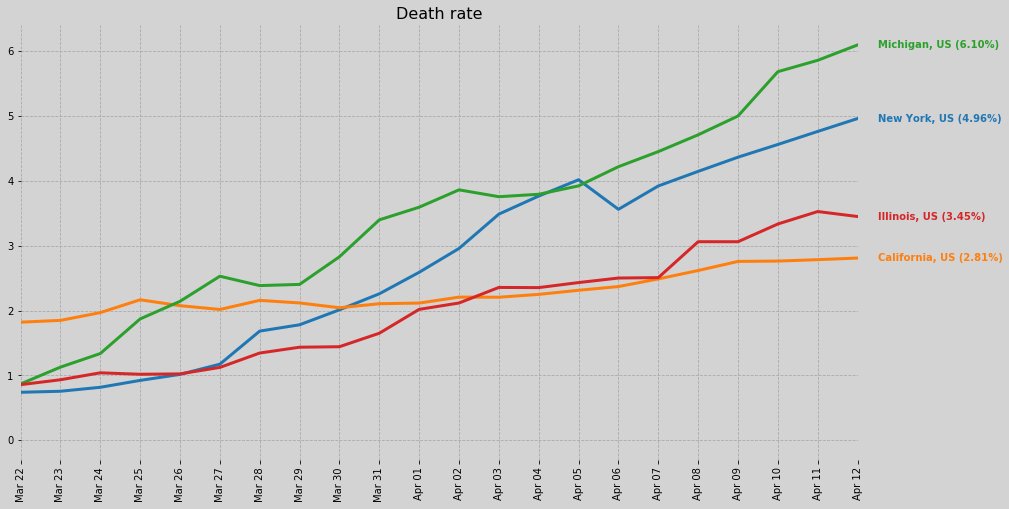

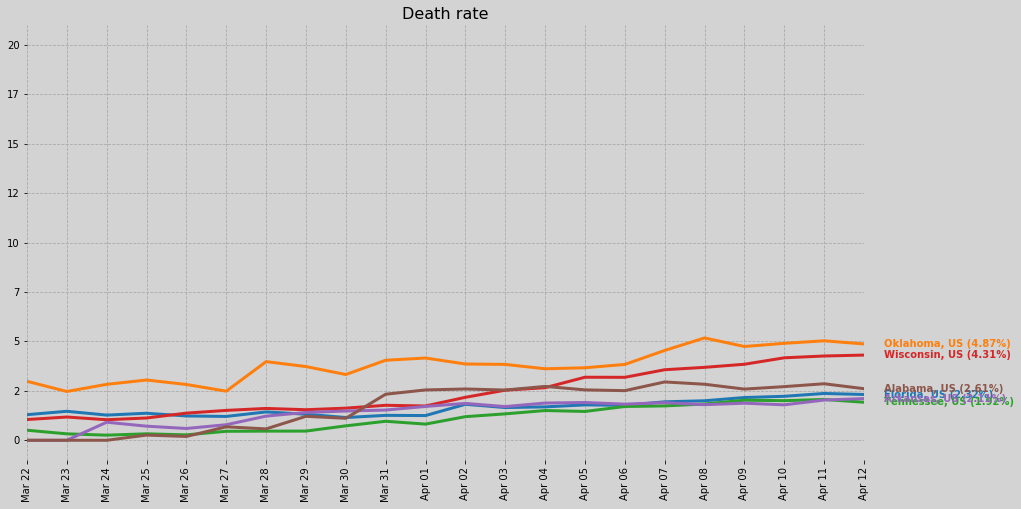

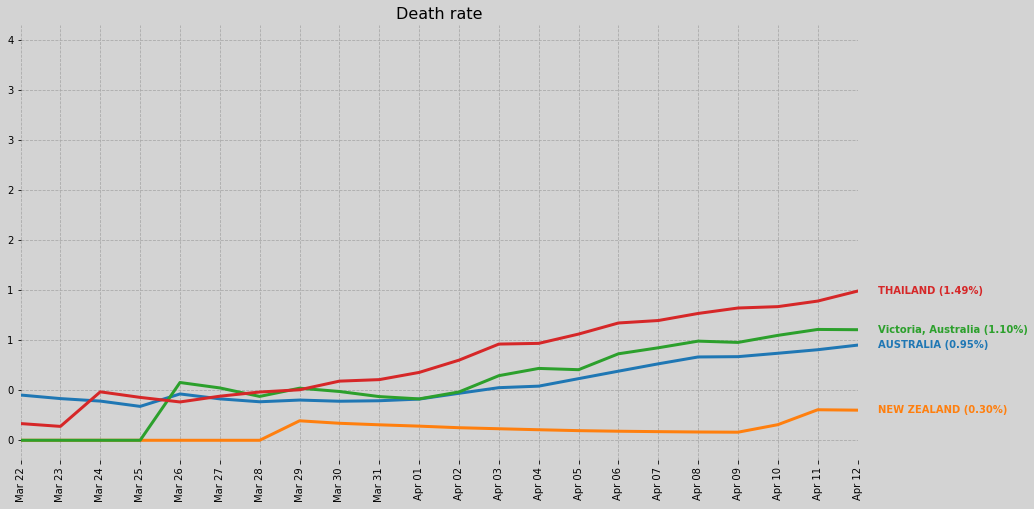

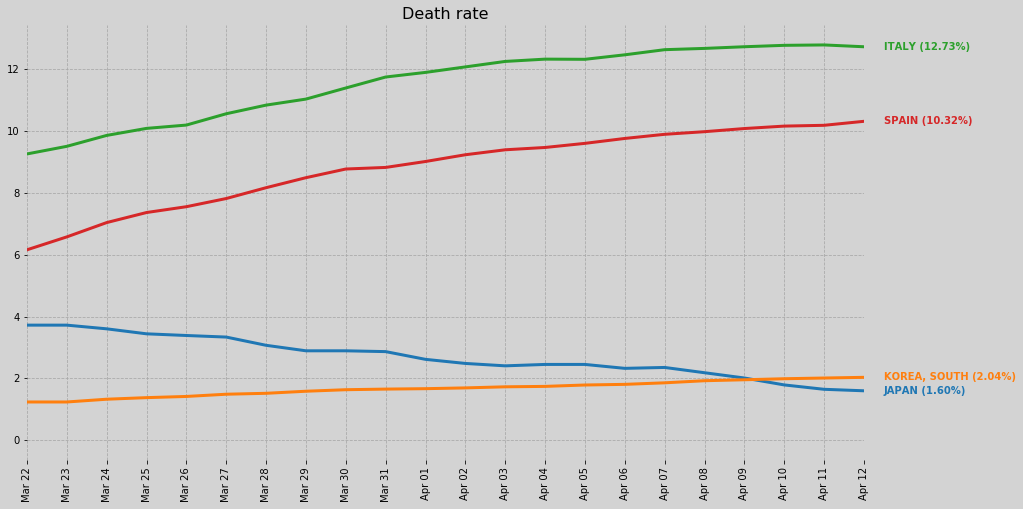

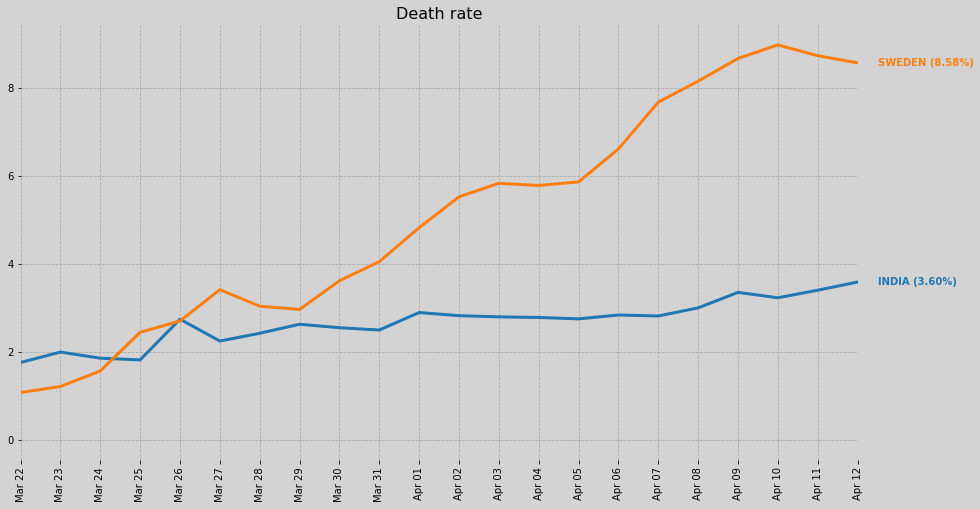

In [284]:
for regions in regionss:
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)

    minx = len(death_rate)

    for n,s in enumerate(regions):

        region = regions[n]
        idx = (confirmed['Province/State'] == region)
        if sum(idx) == 0:
            idx = (confirmed['Country/Region'] == region)
            l = '{}'.format(confirmed.loc[idx, 'Country/Region'].head(1).item()).upper()
        else:
            l = '{}, {}'.format(region, confirmed.loc[idx, 'Country/Region'].head(1).item())

        y = death_rate[s]
        x = [datetime.datetime.strptime(c, '%Y%m%d') for c in death_rate.index]

        tmp = next((i for i, x in enumerate(y) if x), None)
        if tmp is None:
            minx = len(death_rate)
        elif tmp < minx:
            minx = tmp

        ax.plot(x, y*100, color = colors(n), linewidth = 3)
        ax.text(x[-1:][0]+datetime.timedelta(0.5), y[-1]*100, '{} ({:.2f}%)'.format(l, y[-1]*100), color = colors(n), fontweight = 'bold', va = 'center', ha = 'left')

    for var in ['top', 'bottom', 'left', 'right']:
        ax.spines[var].set_visible(False)

    ax.grid(linestyle = '--', color = 'darkgrey')

    x = [datetime.datetime.strptime(c, '%Y%m%d') for c in death_rate.index]
    ax.set_xticks(x)
    ax.set_xlim((x[max(minx-10, 0)], x[-1]))
    ax.set_title('Death rate', fontsize = 16)

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_ha('center')
        tick.set_va('top')

    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

    ax.set_xlim(ax.get_xlim()[1]-21, ax.get_xlim()[1])

    xfmt = mdates.DateFormatter('%b %d')
    ax.get_figure().set_facecolor('lightgrey')
    ax.set_facecolor('lightgrey')
    ax.xaxis.set_major_formatter(xfmt)